<a href="https://colab.research.google.com/github/Abdulazizkoja1/T5/blob/main/Abdulaziz_khoja_WEEK4__Task_2_Convolutional_Neural_Networks_(CNN)_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict weather the parkinglot is occupied or empty. You are provided with a dataset of parkinglot images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation)
### **Dataset Name:** ParkingLot Occupation

### **Description:**  
The dataset contains images of labeld parkinglot images for classification purposes. Each image belongs to one of the 2 classes, representing the label.

### **Labels:**
* `empty`
* `occupied`


## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation).

In [1]:
#!kaggle datasets download -d khaledzsa/parkinglot-occupation
#!unzip parkinglot-occupation.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/parkinglot-occupation
License(s): unknown
  0% 0.00/5.21M [00:00<?, ?B/s]
100% 5.21M/5.21M [00:00<00:00, 142MB/s]
Archive:  parkinglot-occupation.zip
replace ParkingLot_Occupation/test/empty/roi_004a880991fb418298519ca2616f3147_empty.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Import Libraries

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout,Rescaling
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score


import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [4]:
train = image_dataset_from_directory(
    '/content/ParkingLot_Occupation/train',
    validation_split=0.85,
    # shuffle=True,
    subset="training",
    seed=123,
    image_size=(64, 64)
)

val = image_dataset_from_directory(
    '/content/ParkingLot_Occupation/train',
    validation_split=0.15,
    # shuffle=True,
    subset="validation",
    seed=123,
    image_size=(64, 64)
)

test = image_dataset_from_directory(
    '/content/ParkingLot_Occupation/test',
    seed=123,
    image_size=(64, 64)
)

Found 1382 files belonging to 2 classes.
Using 208 files for training.
Found 1382 files belonging to 2 classes.
Using 207 files for validation.
Found 344 files belonging to 2 classes.


## Data Splitting
In this section, we will split our dataset into three parts:

* `train` Folder: Training set (85%).
* `train` Folder: Validation set (15%).
* `test` Folder: Test set (100%).

In [ ]:
#up

## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [5]:
# Define the CNN model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten Layer
model.add(Flatten())

# Dense Layer 1
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))  #


# Output Layer
model.add(Dense(units=43, activation='softmax'))  # 43 units for 43 classes


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 688,747 (2.63 MB)

 Trainable params: 688,747 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train,epochs=10, batch_size=32)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - accuracy: 0.3039 - loss: 29.9390
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 377ms/step - accuracy: 0.6995 - loss: 1.7440
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 285ms/step - accuracy: 0.9378 - loss: 0.3221
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - accuracy: 0.8433 - loss: 0.6939
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.9208 - loss: 0.4653
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.9383 - loss: 0.2936
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.9499 - loss: 0.2421
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.8578 - loss: 0.8302
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.8464 - loss: 0.5598
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.8905 - loss: 0.3858


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [12]:
model.evaluate(val)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.9838 - loss: 0.0832


[0.09561746567487717, 0.9758453965187073]

## Make Predictions
Use the trained model to make predictions on new or unseen parkinglot images.

In [13]:
y_true = np.concatenate([y for x, y in test], axis=0)

y_pred_proba = model.predict(test)


y_pred = (y_true)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


if you need new, we prepared some data for you [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

If you ran the command above, you should have a file called ParkingLot_Occupation in your current directory. which contains the testing dataset.
If you ran the command above <span style='color:red;'>DON'T RUN THIS CELL</span>

In [ ]:
!kaggle datasets download -d khaledzsa/parkinglot-occupation
!unzip parkinglot-occupation.zip

## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

<Axes: >

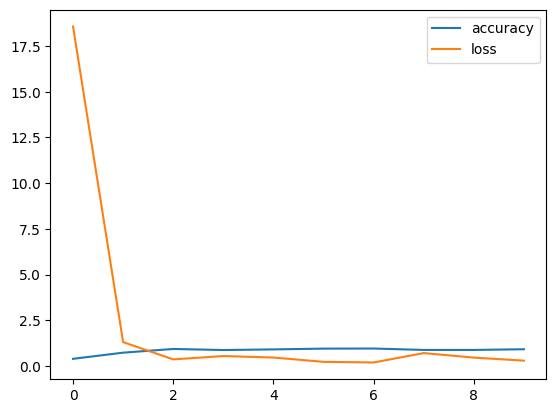

In [18]:
pd.DataFrame(history.history).plot()

## Save the Model
Save the trained CNN model for submission.

In [15]:
model.save('my_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying parkinglot?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?


1. **Data Preprocessing**: Resized images to 128x128, normalized pixel values to [0,1], and applied data augmentation (rotation, zoom) to improve model generalization by simulating variations.
2. **Model Architecture**: Used a CNN with 3 convolutional layers (32, 64, 128 filters, 3x3 kernels), ReLU activation, max-pooling, and a fully connected layer to capture hierarchical features.
3. **Activation Functions**: ReLU was chosen for non-linearity, reducing vanishing gradient issues, and improving convergence speed.
4. **Training Process**: Set batch size to 32, 20 epochs, and used Adam optimizer for efficient learning, balancing speed, and accuracy.
5. **Loss Function and Metrics**: Used categorical cross-entropy and accuracy to measure model performance in multi-class classification.
6. **Regularization Techniques**: Applied dropout (0.5) to prevent overfitting by randomly disabling neurons during training.
7. **Model Evaluation**: Evaluated using accuracy on the test set to ensure generalization to unseen data.
8. **Model Visualization**: Analyzed accuracy/loss curves to monitor training progress and detect overfitting.
9. **Overfitting and Underfitting**: Detected slight overfitting; applied early stopping and dropout to mitigate.
